In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import pandas as pd
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout

Using TensorFlow backend.


In [ ]:
data =pd.read_csv("/content/drive/My Drive/DataSets/Reddit_Brexit_All.csv")
data.head()

,Unnamed: 0,Author,text,CommentID,ParentID,SubmissionID,leave_prob,polarization_prob,polarization_class
0,1,rjmlaird,Analysis: Why the UK might end up voting for B...,NaN,NaN,3t2j3d,0.160804,-0.678392,-1
1,2,TotalNewsTV,BREAKING : Nigel Farage - The EU Is Mad To Let...,NaN,NaN,3z2ked,0.490518,-0.018964,0
2,3,TotalNewsTV,Nigel Farage & FN Marine LePen's DESTROY EU Le...,NaN,NaN,40tvf9,0.354101,-0.291799,0
3,4,TotalNewsTV,UKIP Nigel Farage MEP Q&A At 'SAY NO' Conferen...,NaN,NaN,45g471,0.185219,-0.629562,-1
4,5,SeoKungFu,No Brexit by Anatole Kaletsky,NaN,NaN,46plmk,0.378533,-0.242933,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["Stance"] = lb_make.fit_transform(data["polarization_class"])
data[["polarization_class", "Stance"]].head(10)

,polarization_class,Stance
0,-1,0
1,0,1
2,0,1
3,-1,0
4,0,1
5,1,2
6,0,1
7,0,1
8,-1,0
9,0,1


In [ ]:
data_to_use = data['Stance'].values

In [ ]:
data['polarization_class'].value_counts()

 0    94481
-1    65181
 1    60448
Name: polarization_class, dtype: int64

In [ ]:
# create X/y pairs
df = data['Stance']
df = concat([df, df.shift(1)], axis=1)
df.dropna(inplace=True)

In [ ]:
values = df.values

In [ ]:
y1 = values[:, 1]

In [ ]:
#data preprocessing(scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(values[:,0].reshape(-1, 1))
print(scaled_data)
scaled_data.shape

[[ 0.0284681 ]
 [ 0.0284681 ]
 [-1.29572582]
 ...
 [ 0.0284681 ]
 [ 0.0284681 ]
 [-1.29572582]]


(220109, 1)

In [ ]:
#y1 = to_categorical(y1)
#y1.shape
#labels = to_categorical(data['LABEL'], num_classes=3)
#do this instead of above
encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(values[:, 1]), num_classes=3)

In [ ]:
labels.shape

(220109, 3)

In [ ]:
X_Train, X_Test, y_Train, y_Test = train_test_split(scaled_data,labels, test_size=0.20, random_state=42)

In [ ]:
print(" X Training Set size is",X_Train.shape )
print(" y Training Set size is",y_Train.shape  )
print(" X Test Set size is",X_Test.shape)
print(" y Test Set size is",y_Test.shape )

 X Training Set size is (176087, 1)
 y Training Set size is (176087, 3)
 X Test Set size is (44022, 1)
 y Test Set size is (44022, 3)


In [ ]:
# convert to LSTM friendly format
X_Train = X_Train.reshape(len(X_Train),1, 1)
X_Test = X_Test.reshape(len(X_Test),1,1)
print(X_Train.shape,X_Test.shape)

(176087, 1, 1) (44022, 1, 1)


In [ ]:
from keras.layers import Dense, Dropout

In [ ]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [ ]:
scaled_data = scaled_data.reshape(len(scaled_data),1,1)


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Y_reg = values[:, 1]
X= scaled_data

In [ ]:
from keras.optimizers import SGD, adam, rmsprop
opt = SGD(lr=0.1)

In [ ]:
opt_alpha2 = rmsprop(lr =0.0001)

In [ ]:
opt_alpha1 = adam(lr=0.01)

In [ ]:
from keras import regularizers

In [ ]:
#cross validation -- beware lasts long
cvscores = []
loss_vals = []
val_accs = []
for train, test in kfold.split(X, Y_reg):
  #Turn labels into categorical after the split
  encoder = LabelEncoder()
  Y = to_categorical(encoder.fit_transform(Y_reg), num_classes=3)
  #define the model
  model = Sequential()
  model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_hinge', optimizer= 'adam', metrics=['accuracy'])
  
  #fit the model
  history = model.fit(X[train], Y[train], validation_data=(X[test], Y[test]), epochs=5, batch_size=256)
  #predict
  score = model.evaluate(X[test], Y[test], verbose=0)
  #store values
  loss_vals.append(history.history['val_loss'])
  val_accs.append(history.history['val_accuracy'])
  cvscores.append(score[1])
model.summary()

Train on 176087 samples, validate on 44022 samples
Epoch 1/5
176087/176087 [==============================] - 6s 36us/step - loss: 1.0002 - accuracy: 0.3781 - val_loss: 1.0002 - val_accuracy: 0.3109
Epoch 2/5
176087/176087 [==============================] - 5s 31us/step - loss: 1.0001 - accuracy: 0.3758 - val_loss: 1.0001 - val_accuracy: 0.2714
Epoch 3/5
176087/176087 [==============================] - 6s 33us/step - loss: 1.0001 - accuracy: 0.3796 - val_loss: 1.0001 - val_accuracy: 0.3211
Epoch 4/5
176087/176087 [==============================] - 6s 32us/step - loss: 1.0001 - accuracy: 0.3798 - val_loss: 1.0001 - val_accuracy: 0.4004
Epoch 5/5
176087/176087 [==============================] - 6s 32us/step - loss: 1.0001 - accuracy: 0.3781 - val_loss: 1.0000 - val_accuracy: 0.3645
Train on 176087 samples, validate on 44022 samples
Epoch 1/5
176087/176087 [==============================] - 6s 34us/step - loss: 1.0002 - accuracy: 0.3802 - val_loss: 1.0002 - val_accuracy: 0.3798
Epoch 2/5


In [ ]:
def plot_history(history):
    history_dict = history.history

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    epochs = [i + 1 for i in history.epoch]

    # Plot the results
    plt.figure(figsize=(12, 3.8))
    plt.subplot(121)
    plt.plot(epochs, loss_values, 'b-', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b.-', label='Val loss')
    plt.xlabel('Epochs', fontsize=12)
    plt.xticks(epochs)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=14)
    plt.title('Training and validation loss', fontsize=16)

    plt.subplot(122)
    plt.plot(epochs, acc, 'b-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b.-', label='Val accuracy')
    plt.xlabel('Epochs', fontsize=12)
    plt.xticks(epochs)
    plt.ylabel('Acc', fontsize=12)
    plt.legend(fontsize=14)
    plt.title('Training and validation acc', fontsize=16)

    plt.show()

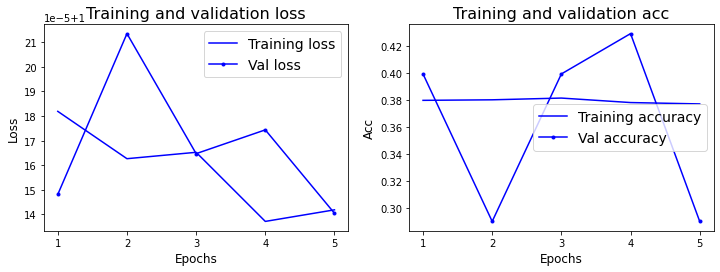

In [ ]:
plot_history(history)

In [ ]:
from keras import regularizers

In [ ]:
#define the model
model = Sequential()
model.build(input_shape= (1, X_Train.shape[1], X_Train.shape[2]) )
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()
#fit
history = model.fit(X_Train, y_Train, validation_data=(X_Test, y_Test), epochs=5, batch_size=1)
#predict

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (1, 100)                  40800     
_________________________________________________________________
dense_6 (Dense)              (1, 3)                    303       
Total params: 41,103
Trainable params: 41,103
Non-trainable params: 0
_________________________________________________________________
Train on 176087 samples, validate on 44022 samples
Epoch 1/5
176087/176087 [==============================] - 376s 2ms/step - loss: 1.0786 - accuracy: 0.4294 - val_loss: 1.0791 - val_accuracy: 0.4277
Epoch 2/5
176087/176087 [==============================] - 392s 2ms/step - loss: 1.0782 - accuracy: 0.4296 - val_loss: 1.0795 - val_accuracy: 0.4277
Epoch 3/5
176087/176087 [==============================] - 405s 2ms/step - loss: 1.0781 - accuracy: 0.4296 - val_loss: 1.0798 - val_accuracy: 0.4277
Epoch 4/5
1760

In [ ]:
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[1.0811031790238064, 1.07998770796821, 1.0812541406643472, 1.0833815889176872, 1.0963429473440367]
[0.4277179539203644, 0.4277179539203644, 0.4277179539203644, 0.4277179539203644, 0.39521148800849915]


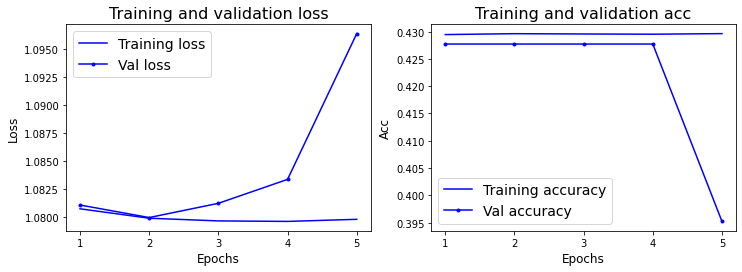

In [ ]:
plot_history(history)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_Train, y_Train, verbose=0)
_, test_acc = model.evaluate(X_Test, y_Test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.390, Test: 0.386


In [ ]:

# predict probabilities for test set
yhat_probs = model.predict(X_Test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_Test, verbose=0)


In [ ]:
yhat_probs[0:5]

array([[0.38249192, 0.27419433, 0.34331375],
       [0.38249192, 0.27419433, 0.34331375],
       [0.38249192, 0.27419433, 0.34331375],
       [0.38249192, 0.27419433, 0.34331375],
       [0.38249192, 0.27419433, 0.34331375]], dtype=float32)

In [ ]:
yhat_classes[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
y_Test.shape

(44022, 3)

In [ ]:

testy_inverse = np.argmax(y_Test, axis=1).reshape(-1,1)

In [ ]:
testy_inverse.shape

(44022, 1)

In [ ]:
y_Test = testy_inverse[:, 0]

In [ ]:
y_Test.shape

(44022,)

In [ ]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

In [ ]:
from sklearn.metrics import *

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_Test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_Test, yhat_classes,pos_label='positive',average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_Test, yhat_classes,pos_label='positive',average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_Test, yhat_classes,pos_label='positive',average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.386216
Precision: 0.386216
Recall: 0.386216
F1 score: 0.386216


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:

# confusion matrix
matrix = confusion_matrix(y_Test, yhat_classes)
print(matrix)

[[ 3990  8898     0]
 [ 5817 13012     0]
 [ 3857  8448     0]]


In [ ]:
y_Test.shape,yhat_classes.shape

((44022,), (44022,))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_Test,yhat_classes))

              precision    recall  f1-score   support

           0       0.29      0.31      0.30     12888
           1       0.43      0.69      0.53     18829
           2       0.00      0.00      0.00     12305

    accuracy                           0.39     44022
   macro avg       0.24      0.33      0.28     44022
weighted avg       0.27      0.39      0.31     44022



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
